# <span style="color:#0b486b">  FIT5215: Deep Learning (2024)</span>
***
*CE/Lecturer (Clayton):*  **Dr Trung Le** | trunglm@monash.edu <br/>
*Lecturer (Clayton):* **Prof Dinh Phung** | dinh.phung@monash.edu <br/>
*Lecturer (Malaysia):*  **Dr Arghya Pal** | arghya.pal@monash.edu <br/>
*Lecturer (Malaysia):*  **Dr Lim Chern Hong** | lim.chernhong@monash.edu <br/>  <br/>
*Head Tutor 3181:*  **Miss Vy Vo** |  \[v.vo@monash.edu \] <br/>
*Head Tutor 5215:*  **Dr Van Nguyen** |  \[van.nguyen1@monash.edu \]

<br/> <br/>
Faculty of Information Technology, Monash University, Australia
***

# <span style="color:#0b486b">  Student Information</span>
***
Surname: **Peng**  <br/>
Firstname: **Yuhang**    <br/>
Student ID: **34278818**    <br/>
Email: **ypen0076@student.monash.edu**    <br/>
Your tutorial time: **LAB 05 MON 16:00**    <br/>
***

# <span style="color:#0b486b">Deep Neural Networks</span>
### Due: <span style="color:red">11:55pm Sunday, 8 September 2024</span>  (Sunday)

#### <span style="color:red">Important note:</span> This is an **individual** assignment. It contributes **20%** to your final mark. Read the assignment instructions carefully.

## <span style="color:#0b486b">What to submit</span>

This assignment is to be completed individually and submitted to Moodle unit site. **By the due date, you are required to submit one  <span style="color:red; font-weight:bold">single zip file, named xxx_assignment01_solution.zip</span> where `xxx` is your student ID, to the corresponding Assignment (Dropbox) in Moodle**. You can use Google Colab to do Assigmnent 1 but you need to save it to an `*.ipynb` file to submit to the unit Moodle.

**More importantly, if you use Google Colab to do this assignment, you need to first make a copy of this notebook on your Google drive**.

***For example, if your student ID is <span style="color:red; font-weight:bold">12356</span>, then gather all of your assignment solution to folder, create a zip file named <span style="color:red; font-weight:bold">123456_assignment01_solution.zip</span> and submit this file.***

Within this zip folder, you **must** submit the following files:
1.	**Assignment01_solution.ipynb**:  this is your Python notebook solution source file.
1.	**Assignment01_output.html**: this is the output of your Python notebook solution *exported* in html format.
1.	Any **extra files or folder** needed to complete your assignment (e.g., images used in your answers).

Since the notebook is quite big to load and work together, one recommended option is to split solution into three parts and work on them seperately. In that case, replace **Assignment01_solution.ipynb** by three notebooks: **Assignment01_Part1_solution.ipynb**, **Assignment01_Part2_solution.ipynb** and **Assignment01_Part3_solution.ipynb**

**You can run your codes on Google Colab. In this case, you have to make a copy of your Google colab notebook including the traces and progresses of model training before submitting.**



## <span style="color:#0b486b">Part 2: Deep Neural Networks (DNN) </span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 25 points]<span></div>

The second part of this assignment is to demonstrate your basis knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the tutorials covered from weeks 1 to 2**. Going through these materials before attempting this assignment is highly recommended.

In the second part of this assignment, you are going to work with the FashionMNIST dataset for image recognition task. It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem is significantly more challenging than MNIST.

In [1]:
import math
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid

torch.manual_seed(1234)

**Load the Fashion MNIST using `torchvision`**

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset_orgin = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

print(train_dataset_orgin.data.shape, train_dataset_orgin.targets.shape)
print(test_dataset.data.shape, test_dataset.targets.shape)

train_dataset_orgin.data = train_dataset_orgin.data.view(-1, 28*28)
test_dataset.data = test_dataset.data.view(-1, 28*28)

print(train_dataset_orgin.data.shape, train_dataset_orgin.targets.shape)
print(test_dataset.data.shape, test_dataset.targets.shape)

N = len(train_dataset_orgin)
N_train = int(0.9*N)
N_val = N - N_train

train_dataset, val_dataset = torch.utils.data.random_split(train_dataset_orgin, [N_train, N_val])

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

print(f"Number of total samples: {N}")
print(f"Number of training samples: {N_train}")
print(f"Number of validation samples: {N_val}")

torch.Size([60000, 28, 28]) torch.Size([60000])
torch.Size([10000, 28, 28]) torch.Size([10000])
torch.Size([60000, 784]) torch.Size([60000])
torch.Size([10000, 784]) torch.Size([10000])
Number of total samples: 60000
Number of training samples: 54000
Number of validation samples: 6000


####  <span style="color:red">**Question 2.1:**</span> Write the code to visualize a mini-batch in `train_loader` including its images and labels.

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

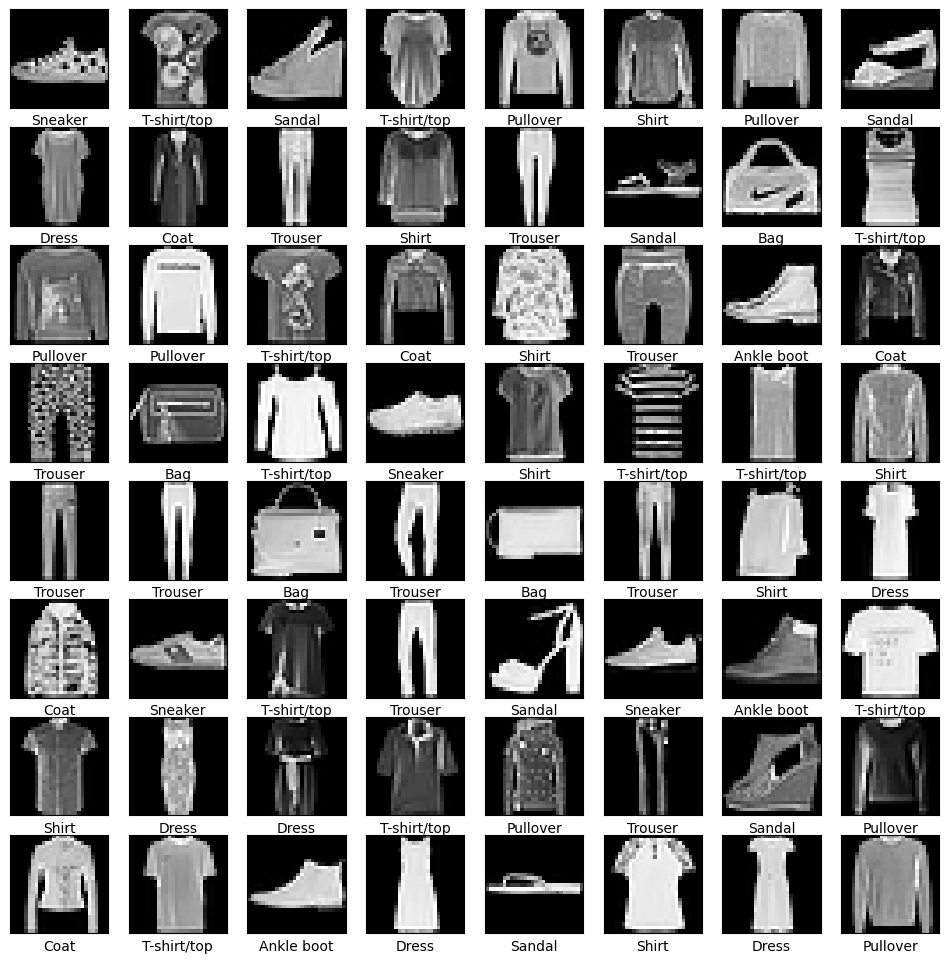

In [3]:
#Your code here
def imshow(img):
    img = img.reshape(28, 28)
    plt.imshow(img, cmap='gray') 
    
def visualise_data(images, categories, images_per_row=8):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    n_images = len(images)
    n_rows = math.ceil(float(n_images) / images_per_row)
    fig = plt.figure(figsize=(1.5 * images_per_row, 1.5 * n_rows))
    fig.patch.set_facecolor('white')
    for i in range(n_images):
        plt.subplot(n_rows, images_per_row, i+1)
        plt.xticks([])
        plt.yticks([])
        imshow(images[i])
        class_index = categories[i]
        plt.xlabel(class_names[class_index])
    plt.show()
    
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy() # convert images to numpy for display

visualise_data(images, labels)

<span style="color:red">**Question 2.2:**</span> Write the code for the feed-forward neural net using PyTorch

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

We now develop a feed-forward neural network with the architecture $784 \rightarrow 40(ReLU) \rightarrow 30(ReLU) \rightarrow 10(softmax)$. You can choose your own way to implement your network and an optimizer of interest. You should train model in $20$ epochs and evaluate the trained model on the test set.

In [4]:
#Your code here
class FeedForwardNN(nn.Module):
    
    def __init__(self):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 40)
        self.fc2 = nn.Linear(40, 30)
        self.fc3 = nn.Linear(30, 10)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x) # output the logits
        return x

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
def compute_loss(model, data_loader):
    """
    This function computes the loss of the model on a data loader
    """
    #Your code here
    loss = 0.0
    # Set model to eval mode for inference
    model.eval()
    with torch.no_grad():
        for (batchX, batchY) in data_loader:
            # Move data to the same device as the model
            batchX, batchY = batchX.to(device), batchY.to(device)
            loss += loss_fn(model(batchX), batchY)
    model.train()
    return loss / len(data_loader)

In [7]:
def compute_acc(model, data_loader):
    """
    This function computes the accuracy of the model on a data loader
    """
    #Your code here
    correct = 0
    totals = 0
    # Set model to eval mode for inference
    model.eval()
    for (batchX, batchY) in data_loader:
        # Move batchX and batchY to the same device as the model
        batchX, batchY = batchX.to(device), batchY.to(device)
        outputs = model(batchX) # feed batch to the model
        totals += batchY.size(0) # accumulate totals with the current batch size
        predicted = torch.argmax(outputs.data, 1) # get the predicted class
        correct += (predicted == batchY).sum().item()
    model.train()
    return correct / totals

In [9]:
model = FeedForwardNN().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# train the model
epochs = 20
for epoch in range(epochs):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_acc = compute_acc(model, train_loader)
    train_loss = compute_loss(model, train_loader)
    val_acc = compute_acc(model, val_loader)
    val_loss = compute_loss(model, val_loader)
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc*100:.2f}%")

Epoch 1/20, Train Loss: 0.6353, Train Acc: 76.58%, Val Loss: 0.6631, Val Acc: 75.67%
Epoch 2/20, Train Loss: 0.5319, Train Acc: 80.71%, Val Loss: 0.5665, Val Acc: 79.78%
Epoch 3/20, Train Loss: 0.4847, Train Acc: 82.59%, Val Loss: 0.5216, Val Acc: 81.13%
Epoch 4/20, Train Loss: 0.4557, Train Acc: 83.74%, Val Loss: 0.4960, Val Acc: 82.28%
Epoch 5/20, Train Loss: 0.4359, Train Acc: 84.59%, Val Loss: 0.4758, Val Acc: 82.98%
Epoch 6/20, Train Loss: 0.4269, Train Acc: 84.77%, Val Loss: 0.4659, Val Acc: 83.42%
Epoch 7/20, Train Loss: 0.4257, Train Acc: 84.73%, Val Loss: 0.4723, Val Acc: 83.42%
Epoch 8/20, Train Loss: 0.4103, Train Acc: 85.26%, Val Loss: 0.4519, Val Acc: 83.72%
Epoch 9/20, Train Loss: 0.3966, Train Acc: 85.81%, Val Loss: 0.4460, Val Acc: 84.32%
Epoch 10/20, Train Loss: 0.3834, Train Acc: 86.31%, Val Loss: 0.4317, Val Acc: 84.58%
Epoch 11/20, Train Loss: 0.3754, Train Acc: 86.71%, Val Loss: 0.4268, Val Acc: 85.17%
Epoch 12/20, Train Loss: 0.3677, Train Acc: 86.91%, Val Loss: 0

In [10]:
test_acc = compute_acc(model, test_loader)

print(f'Accuracy of the network on the test set: {test_acc*100:.2f}%')

Accuracy of the network on the test set: 85.85%


####  <span style="color:red">**Question 2.3:**</span> Tuning hyper-parameters with grid search
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>


Assume that you need to tune the number of neurons on the first and second hidden layers $n_1 \in \{20, 40\}$, $n_2 \in \{20, 40\}$  and the used activation function  $act \in \{sigmoid, tanh, relu\}$. The network has the architecture pattern $784 \rightarrow n_1 (act) \rightarrow n_2(act) \rightarrow 10(softmax)$ where $n_1, n_2$, and $act$ are in their grides. Write the code to tune the hyper-parameters $n_1, n_2$, and $act$. Note that you can freely choose the optimizer and learning rate of interest for this task.

In [11]:
#Your code here
class CustomFeedForwardNN(nn.Module):
    def __init__(self, n1, n2, activation_func):
        super(CustomFeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(28*28, n1)
        self.fc2 = nn.Linear(n1, n2)
        self.fc3 = nn.Linear(n2, 10)
        self.activation_func = activation_func
    
    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten (batch_size, 1, 28, 28) to (batch_size, 784)
        x = self.activation_func(self.fc1(x))
        x = self.activation_func(self.fc2(x))
        x = self.fc3(x)
        return x

In [12]:
param_grid = {
    'n1': [20, 40],
    'n2': [20, 40],
    'activation_func': [nn.Sigmoid(), nn.Tanh(), nn.ReLU()]
}

grid = list(ParameterGrid(param_grid))
grid

[{'activation_func': Sigmoid(), 'n1': 20, 'n2': 20},
 {'activation_func': Sigmoid(), 'n1': 20, 'n2': 40},
 {'activation_func': Sigmoid(), 'n1': 40, 'n2': 20},
 {'activation_func': Sigmoid(), 'n1': 40, 'n2': 40},
 {'activation_func': Tanh(), 'n1': 20, 'n2': 20},
 {'activation_func': Tanh(), 'n1': 20, 'n2': 40},
 {'activation_func': Tanh(), 'n1': 40, 'n2': 20},
 {'activation_func': Tanh(), 'n1': 40, 'n2': 40},
 {'activation_func': ReLU(), 'n1': 20, 'n2': 20},
 {'activation_func': ReLU(), 'n1': 20, 'n2': 40},
 {'activation_func': ReLU(), 'n1': 40, 'n2': 20},
 {'activation_func': ReLU(), 'n1': 40, 'n2': 40}]

In [13]:
epochs = 20
best_accuracy = 0.0
best_params = None

for params in grid:
    print(f"\nTesting parameters: n1 = {params['n1']}, n2 = {params['n2']}, activation_func = {params['activation_func']}")
    model = CustomFeedForwardNN(params['n1'], params['n2'], params['activation_func']).to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    for epoch in range(epochs):
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        train_acc = compute_acc(model, train_loader)
        train_loss = compute_loss(model, train_loader)
        val_acc = compute_acc(model, val_loader)
        val_loss = compute_loss(model, val_loader)
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc*100:.2f}%")
        if val_acc > best_accuracy:
            best_accuracy = val_acc
            best_params = params

print(f'Best Params: {best_params}, Best Validation Accuracy: {best_accuracy*100:.2f}%')


Testing parameters: n1 = 20, n2 = 20, activation_func = Sigmoid()
Epoch 1/20, Train Loss: 2.2482, Train Acc: 25.03%, Val Loss: 2.2492, Val Acc: 24.72%
Epoch 2/20, Train Loss: 2.1052, Train Acc: 27.31%, Val Loss: 2.1080, Val Acc: 26.60%
Epoch 3/20, Train Loss: 1.8882, Train Acc: 29.27%, Val Loss: 1.8927, Val Acc: 29.37%
Epoch 4/20, Train Loss: 1.7531, Train Acc: 35.15%, Val Loss: 1.7595, Val Acc: 34.15%
Epoch 5/20, Train Loss: 1.6734, Train Acc: 43.48%, Val Loss: 1.6799, Val Acc: 42.30%
Epoch 6/20, Train Loss: 1.6017, Train Acc: 47.99%, Val Loss: 1.6097, Val Acc: 46.72%
Epoch 7/20, Train Loss: 1.5191, Train Acc: 49.19%, Val Loss: 1.5287, Val Acc: 48.03%
Epoch 8/20, Train Loss: 1.4271, Train Acc: 51.98%, Val Loss: 1.4384, Val Acc: 51.12%
Epoch 9/20, Train Loss: 1.3396, Train Acc: 50.59%, Val Loss: 1.3543, Val Acc: 49.70%
Epoch 10/20, Train Loss: 1.2647, Train Acc: 52.87%, Val Loss: 1.2817, Val Acc: 51.53%
Epoch 11/20, Train Loss: 1.2029, Train Acc: 54.51%, Val Loss: 1.2219, Val Acc: 53.

####  <span style="color:red">**Question 2.4:**</span> Implement the loss with the form: $loss(p,y)=CE(1_{y},p)+\lambda H(p)$ where $H(p)=-\sum_{i=1}^{M}p_{i}\log p_{i}$ is the entropy of $p$, $p$ is the prediction probabilities of a data point $x$ with the ground-truth label $y$, $1_y$ is an one-hot label, and $\lambda >0$ is a trade-off parameter. Set $\lambda = 0.1$ to train a model.

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>


The specific form of the loss function is as follows:
$$
\text{loss}(p, y) = CE(1_y, p) + \lambda H(p)
$$
Where:
- CE is the cross-entropy loss.
- $H(p) = -\sum_{i=1}^M p_i \log p_i$ is the entropy of $p$.
- $p$ is the model's output (i.e., the predicted probability distribution), and $y$ is the true label.
- $\lambda$ is a hyperparameter that controls the weight of the entropy term in the loss.

In [15]:
#Your code here
class CustomLoss(nn.Module):
    
    def __init__(self, lambda_value=0.1):
        super(CustomLoss, self).__init__()
        self.lambda_value = lambda_value # weight of the entropy term
        
    def forward(self, outputs, targets):
        # Cross-entropy loss
        ce_loss = F.cross_entropy(outputs, targets)
        
        # Calculate the entropy term
        probs = F.softmax(outputs, dim=1)
        entropy_loss = -torch.sum(probs * torch.log(probs + 1e-9), dim=1).mean() # Prevent log(0)
        
        # Total loss = Cross-entropy loss + Entropy term
        total_loss = ce_loss + self.lambda_value * entropy_loss
        return total_loss

In [16]:
model = CustomFeedForwardNN(n1=40, n2=20, activation_func=nn.ReLU()).to(device)
loss_fn = CustomLoss(lambda_value=0.1)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# train the model
epochs = 20
for epoch in range(epochs):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_acc = compute_acc(model, train_loader)
    train_loss = compute_loss(model, train_loader)
    val_acc = compute_acc(model, val_loader)
    val_loss = compute_loss(model, val_loader)
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc*100:.2f}%")

Epoch 1/20, Train Loss: 0.7315, Train Acc: 75.79%, Val Loss: 0.7596, Val Acc: 75.25%
Epoch 2/20, Train Loss: 0.6113, Train Acc: 80.19%, Val Loss: 0.6459, Val Acc: 79.22%
Epoch 3/20, Train Loss: 0.5400, Train Acc: 82.48%, Val Loss: 0.5783, Val Acc: 81.42%
Epoch 4/20, Train Loss: 0.5128, Train Acc: 83.42%, Val Loss: 0.5557, Val Acc: 81.68%
Epoch 5/20, Train Loss: 0.4775, Train Acc: 84.64%, Val Loss: 0.5199, Val Acc: 82.98%
Epoch 6/20, Train Loss: 0.4609, Train Acc: 85.19%, Val Loss: 0.5040, Val Acc: 83.62%
Epoch 7/20, Train Loss: 0.4607, Train Acc: 85.09%, Val Loss: 0.5059, Val Acc: 83.63%
Epoch 8/20, Train Loss: 0.4335, Train Acc: 86.00%, Val Loss: 0.4802, Val Acc: 84.50%
Epoch 9/20, Train Loss: 0.4202, Train Acc: 86.50%, Val Loss: 0.4681, Val Acc: 84.72%
Epoch 10/20, Train Loss: 0.4157, Train Acc: 86.51%, Val Loss: 0.4652, Val Acc: 84.85%
Epoch 11/20, Train Loss: 0.4073, Train Acc: 86.78%, Val Loss: 0.4587, Val Acc: 85.35%
Epoch 12/20, Train Loss: 0.4174, Train Acc: 86.22%, Val Loss: 0

In [17]:
test_acc = compute_acc(model, test_loader)

print(f'Accuracy of the network on the test set: {test_acc*100:.2f}%')

Accuracy of the network on the test set: 86.21%


####  <span style="color:red">**Question 2.5:**</span> Experimenting with **sharpness-aware minimization** technique
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

Sharpness-aware minimization (SAM) (i.e., [link for main paper](https://openreview.net/pdf?id=6Tm1mposlrM) from Google Deepmind) is a simple yet but efficient technique to improve the generalization ability of deep learning models on unseen data examples. In your research or your work, you might potentially use this idea. Your task is to read the paper and implement *Sharpness-aware minimization (SAM)*. Finally, you need to apply SAM to the best architecture found in **Question 2.3**.   

Sharpness-Aware Minimisation (SAM) is an advanced optimisation technique designed to improve the generalisation ability of machine learning models. SAM achieves this by minimising both the value of the loss function and the "sharpness" of the loss function, thereby finding optimal model parameters that avoid overfitting to the training data.

Sharpness of the loss function:
- Sharpness refers to how "steep" or "flat" the loss function curve is in the parameter space.
- A sharp loss curve indicates that the model's parameters are highly sensitive to small perturbations, which can lead to overfitting on the training data.
- A flat or smooth loss curve indicates that the model's parameters are less sensitive to small changes, often leading to better generalisation.

Objective of SAM:
- SAM aims to find parameters that not only minimise the training loss but also ensure the loss function is flat around the minimum. This is done by solving a min-max optimisation problem to find a global optimum that avoids sharp local minima.

$$
\min_w \max_{\|\epsilon\|_p \leq \rho} \mathcal{L}(w + \epsilon)
$$

Where:
- $w$ represents the model parameters.
- $\mathcal{L}(w+\epsilon)$ is the loss function (e.g., cross-entropy loss) evaluated at the perturbed parameters $w+\epsilon$.
- $\|\epsilon\|_p \leq \rho$ restricts the perturbation $\epsilon$ to be within a ball of radius $\rho$ in the $p$-norm.

The goal is to find parameters $w$ such that the loss $\mathcal{L}$ is minimised even under small perturbations $\epsilon$, resulting in a model with better generalisation.

SAM employs a two-step optimisation strategy:
1. Perturb the Parameters:
    - Compute the gradient of the loss with respect to the current parameters $w$, denoted as $\nabla_w \mathcal{L}(w)$.
    - Compute the perturbation $\epsilon = \rho \frac{\nabla_w \mathcal{L}(w)}{\|\nabla_w \mathcal{L}(w)\|_2}$ and apply it to the parameters: $w^{\prime} = w + \epsilon$.
2. Restore and Update Parameters:
    - Use the perturbed parameters $w^{\prime}$ to compute the loss and update the original parameters $w$ based on the gradient of this perturbed loss.
    - After the update, restore the parameters $w^{\prime}$ to their original values $w$ and proceed with a standard gradient descent update.

In [18]:
#Your code here
class SAM:
    
    def __init__(self, base_optimiser, rho=0.05):
        self.base_optimiser = base_optimiser
        self.rho = rho
        self.param_groups = self.base_optimiser.param_groups
        self.state = {} # Initialise the state dictionary
        
    @torch.no_grad() 
    def first_step(self, zero_grad=False):
        grad_norm = self._grad_norm()
        for group in self.param_groups:
            scale = self.rho / (grad_norm + 1e-12) # Scale the perturbation
            for p in group['params']:
                if p.grad is None:
                    continue
                if p not in self.state:
                    self.state[p] = {} # Ensure there's an entry in the state for each parameter
                self.state[p]['old_p'] = p.data.clone() # Save the original parameter value
                e_w = p.grad * scale.to(p) # Calculate perturbation
                p.add_(e_w) # Apply perturbation to the parameter
        if zero_grad:
            self.zero_grad()
            
    @torch.no_grad()
    def second_step(self, zero_grad=False):
        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                p.data = self.state[p]['old_p'] # Restore the original parameter value
        self.base_optimiser.step() # Perform the standard optimiser step
        if zero_grad:
            self.zero_grad()
            
    def _grad_norm(self):
        # Calculate the norm of the gradients
        norm = torch.norm(torch.stack([
            p.grad.norm(p=2)
            for group in self.param_groups for p in group['params']
            if p.grad is not None
        ]))
        return norm
    
    def zero_grad(self):
        self.base_optimiser.zero_grad()

In [19]:
model = CustomFeedForwardNN(n1=40, n2=20, activation_func=nn.ReLU()).to(device)
base_optimiser = optim.SGD(model.parameters(), lr=0.01)
optimiser = SAM(base_optimiser)
loss_fn = CustomLoss(lambda_value=0.1)

# train the model
epochs = 20
for epoch in range(epochs):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        # Step 1: Calculate the original loss and apply perturbation
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimiser.first_step(zero_grad=True)
        # Step 2: Calculate the loss with perturbed parameters and update parameters
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimiser.second_step(zero_grad=True)
    train_acc = compute_acc(model, train_loader)
    train_loss = compute_loss(model, train_loader)
    val_acc = compute_acc(model, val_loader)
    val_loss = compute_loss(model, val_loader)
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc*100:.2f}%")

Epoch 1/20, Train Loss: 0.7521, Train Acc: 75.10%, Val Loss: 0.7759, Val Acc: 74.58%
Epoch 2/20, Train Loss: 0.6213, Train Acc: 79.49%, Val Loss: 0.6563, Val Acc: 78.30%
Epoch 3/20, Train Loss: 0.5581, Train Acc: 82.00%, Val Loss: 0.5974, Val Acc: 80.63%
Epoch 4/20, Train Loss: 0.5283, Train Acc: 82.76%, Val Loss: 0.5714, Val Acc: 81.23%
Epoch 5/20, Train Loss: 0.5007, Train Acc: 83.73%, Val Loss: 0.5449, Val Acc: 82.15%
Epoch 6/20, Train Loss: 0.4831, Train Acc: 84.40%, Val Loss: 0.5275, Val Acc: 82.50%
Epoch 7/20, Train Loss: 0.4655, Train Acc: 85.04%, Val Loss: 0.5109, Val Acc: 82.98%
Epoch 8/20, Train Loss: 0.4523, Train Acc: 85.52%, Val Loss: 0.4976, Val Acc: 83.60%
Epoch 9/20, Train Loss: 0.4403, Train Acc: 85.83%, Val Loss: 0.4852, Val Acc: 83.97%
Epoch 10/20, Train Loss: 0.4371, Train Acc: 85.82%, Val Loss: 0.4816, Val Acc: 84.10%
Epoch 11/20, Train Loss: 0.4310, Train Acc: 86.01%, Val Loss: 0.4799, Val Acc: 84.23%
Epoch 12/20, Train Loss: 0.4169, Train Acc: 86.40%, Val Loss: 0

In [20]:
test_acc = compute_acc(model, test_loader)

print(f'Accuracy of the network on the test set: {test_acc*100:.2f}%')

Accuracy of the network on the test set: 86.04%
